In [39]:
import pandas as pd
df = pd.read_excel('Когортный анализ.xlsx')
df.head

<bound method NDFrame.head of        user_id       date  price
0        A0005 2020-03-25     50
1        A0005 2020-03-25     40
2        A0005 2020-03-26     70
3        A0005 2020-03-27     20
4        A0005 2020-03-29     50
...        ...        ...    ...
704835   Z9247 2021-01-10     20
704836   Z9247 2021-01-11     50
704837   Z9247 2021-01-11     70
704838   Z9247 2021-01-11     20
704839   Z9247 2021-01-11     40

[704840 rows x 3 columns]>

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df['month_year'] = df['date'].apply(get_month)

In [42]:
df['cohortMonth'] = df.groupby('user_id')['month_year'].transform('min')

In [43]:
df.head

<bound method NDFrame.head of        user_id       date  price month_year cohortMonth
0        A0005 2020-03-25     50 2020-03-01  2020-03-01
1        A0005 2020-03-25     40 2020-03-01  2020-03-01
2        A0005 2020-03-26     70 2020-03-01  2020-03-01
3        A0005 2020-03-27     20 2020-03-01  2020-03-01
4        A0005 2020-03-29     50 2020-03-01  2020-03-01
...        ...        ...    ...        ...         ...
704835   Z9247 2021-01-10     20 2021-01-01  2021-01-01
704836   Z9247 2021-01-11     50 2021-01-01  2021-01-01
704837   Z9247 2021-01-11     70 2021-01-01  2021-01-01
704838   Z9247 2021-01-11     20 2021-01-01  2021-01-01
704839   Z9247 2021-01-11     40 2021-01-01  2021-01-01

[704840 rows x 5 columns]>

In [50]:
def get_date(df, column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year, month, day
date_year,date_month,_ = get_date(df,'date')
cohort_year,cohort_month,_ = get_date(df,'cohortMonth')
df.head

<bound method NDFrame.head of        user_id       date  price month_year cohortMonth
0        A0005 2020-03-25     50 2020-03-01  2020-03-01
1        A0005 2020-03-25     40 2020-03-01  2020-03-01
2        A0005 2020-03-26     70 2020-03-01  2020-03-01
3        A0005 2020-03-27     20 2020-03-01  2020-03-01
4        A0005 2020-03-29     50 2020-03-01  2020-03-01
...        ...        ...    ...        ...         ...
704835   Z9247 2021-01-10     20 2021-01-01  2021-01-01
704836   Z9247 2021-01-11     50 2021-01-01  2021-01-01
704837   Z9247 2021-01-11     70 2021-01-01  2021-01-01
704838   Z9247 2021-01-11     20 2021-01-01  2021-01-01
704839   Z9247 2021-01-11     40 2021-01-01  2021-01-01

[704840 rows x 5 columns]>

In [54]:
year_diff = date_year - cohort_year
month_diff = date_moth - cohort_month
df['cohort_index']=year_diff * 12 + month_diff + 1

In [55]:
df.head

<bound method NDFrame.head of        user_id       date  price month_year cohortMonth  cohort_index
0        A0005 2020-03-25     50 2020-03-01  2020-03-01             1
1        A0005 2020-03-25     40 2020-03-01  2020-03-01             1
2        A0005 2020-03-26     70 2020-03-01  2020-03-01             1
3        A0005 2020-03-27     20 2020-03-01  2020-03-01             1
4        A0005 2020-03-29     50 2020-03-01  2020-03-01             1
...        ...        ...    ...        ...         ...           ...
704835   Z9247 2021-01-10     20 2021-01-01  2021-01-01             1
704836   Z9247 2021-01-11     50 2021-01-01  2021-01-01             1
704837   Z9247 2021-01-11     70 2021-01-01  2021-01-01             1
704838   Z9247 2021-01-11     20 2021-01-01  2021-01-01             1
704839   Z9247 2021-01-11     40 2021-01-01  2021-01-01             1

[704840 rows x 6 columns]>

In [56]:
df['cohort_index'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 12, 10,  9, 11, 13, 14])

In [58]:
df1=df.pivot_table(index='cohortMonth',
                   columns='cohort_index',
                   values='user_id',
                   aggfunc=len)

In [59]:
df1

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,9994.0,8175.0,7099.0,6637.0,6171.0,5127.0,4657.0,4278.0,4110.0,4240.0,3831.0,3791.0,3632.0,761.0
2020-02-01,8463.0,8013.0,5565.0,5593.0,4952.0,4184.0,3293.0,2876.0,2633.0,2172.0,1930.0,1595.0,309.0,NaN
2020-03-01,13210.0,9779.0,8148.0,7837.0,7410.0,6000.0,5634.0,5009.0,4595.0,4604.0,4414.0,899.0,NaN,NaN
2020-04-01,10123.0,8725.0,6272.0,6019.0,5769.0,4106.0,3699.0,3356.0,3358.0,3158.0,605.0,NaN,NaN,NaN
2020-05-01,14982.0,10806.0,8616.0,8336.0,7728.0,6609.0,5956.0,5811.0,5598.0,1137.0,NaN,NaN,NaN,NaN
2020-06-01,11304.0,9783.0,6793.0,6603.0,6294.0,5182.0,4710.0,4241.0,808.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,17007.0,11428.0,8432.0,8273.0,7204.0,6673.0,6218.0,1224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,13458.0,10518.0,7241.0,7070.0,6935.0,5753.0,1038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,17781.0,12152.0,8846.0,8656.0,7829.0,1493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
first_column = df1.iloc[:,0]

retention = df1.div(first_column, axis=0)

retention.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1.0,0.82,0.71,0.66,0.62,0.51,0.47,0.43,0.41,0.42,0.38,0.38,0.36,0.08
2020-02-01,1.0,0.95,0.66,0.66,0.59,0.49,0.39,0.34,0.31,0.26,0.23,0.19,0.04,NaN
2020-03-01,1.0,0.74,0.62,0.59,0.56,0.45,0.43,0.38,0.35,0.35,0.33,0.07,NaN,NaN
2020-04-01,1.0,0.86,0.62,0.59,0.57,0.41,0.37,0.33,0.33,0.31,0.06,NaN,NaN,NaN
2020-05-01,1.0,0.72,0.58,0.56,0.52,0.44,0.40,0.39,0.37,0.08,NaN,NaN,NaN,NaN
2020-06-01,1.0,0.87,0.60,0.58,0.56,0.46,0.42,0.38,0.07,NaN,NaN,NaN,NaN,NaN
2020-07-01,1.0,0.67,0.50,0.49,0.42,0.39,0.37,0.07,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1.0,0.78,0.54,0.53,0.52,0.43,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1.0,0.68,0.50,0.49,0.44,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


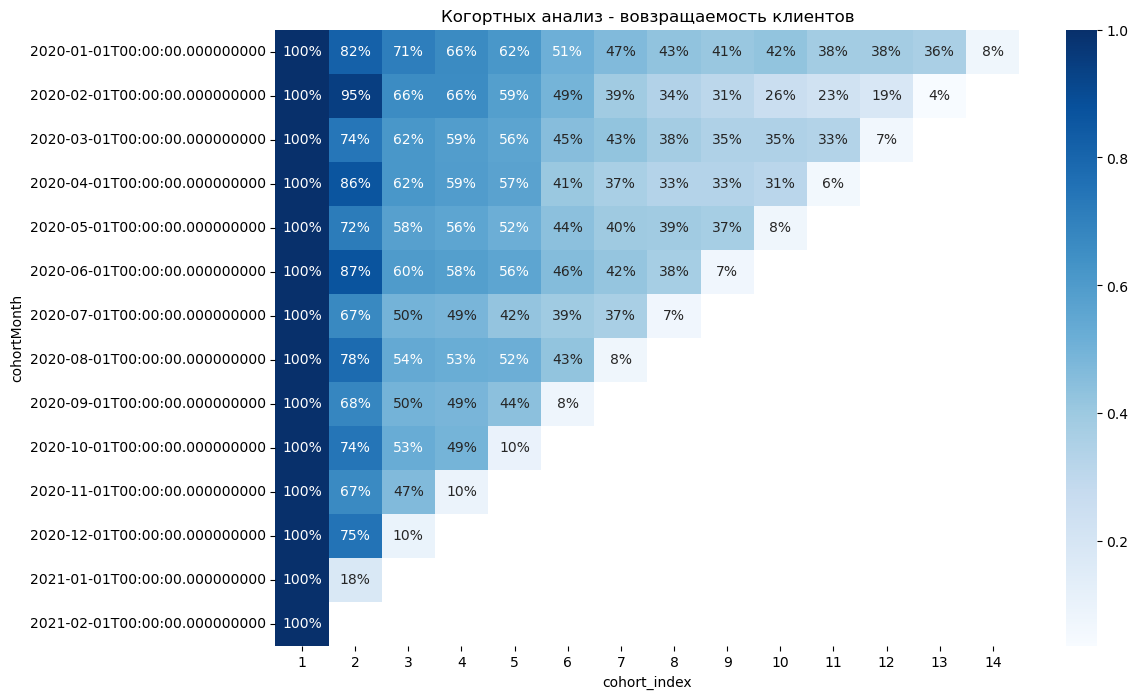

In [66]:
plt.figure(figsize=(12, 8))
plt.title('Когортных анализ - вовзращаемость клиентов')
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.show()

In [68]:
cohort_data_purchase = df.pivot_table(index='cohortMonth',
                                      columns='cohort_index',
                                      values='price',
                                      aggfunc='sum')
#я сделал в процентах, потому что суммы не помещались, особо сильной разницы я не вижу, но могу убрать, если нужно 
first_column_purchase = cohort_data_purchase.iloc[:, 0]
retention_purchase = cohort_data_purchase.div(first_column_purchase, axis=0)

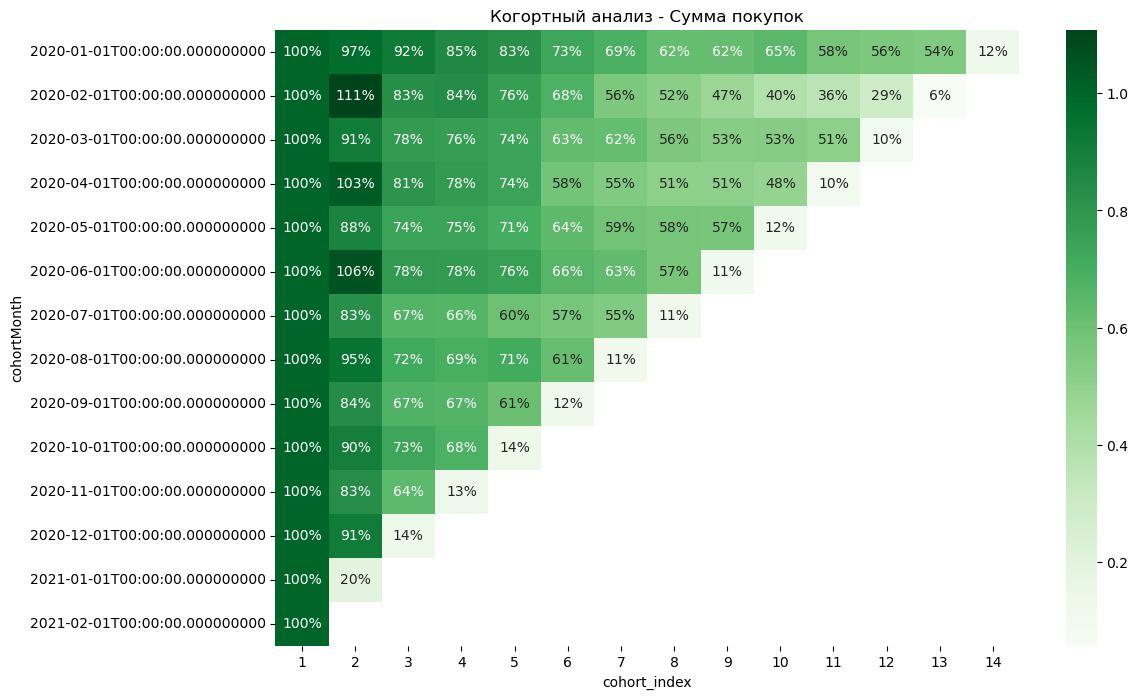

In [70]:
plt.figure(figsize=(12, 8))
plt.title('Когортный анализ - Сумма покупок')
sns.heatmap(retention_purchase, annot=True, fmt='.0%', cmap='Greens')
plt.show()

In [71]:
#Чтож, попробую ответить на вопросы:

In [ ]:
#По первой работе: Во всех когортах наблюдается постепенное снижение возвращаемости клиентов с течением времени.А также спад возвращения клиентов
#Когорта 2020-01.Показывает относительно высокую возвращаемость на протяжении всех месяцев, является лучшей по возвращаемости 
#Когорта 2020-12.Показывает резкое падение возвращаемости на 2-й месяц (13%), что значительно ниже, чем у других когорт. Что является худшей
#Я бы исследовал, почему в некотрых когортах идёт резкий спад возвращаемости клиентов, основываясь на маркетинговых акциях в успешные периоды

#По второй работе:Во всех когортах наблюдается постепенное снижение суммы покупок с течением времени.
#Когорта 2020-07,2020-11 а также 2021-01.Имеют очень высокую сумму покупок в первый месяц, что значительно выше, чем у других когорт. Я бы исследовал, какие акции были в тот период
#Когорта 2021-01 имеет очень низкий показатель во втором месяце, я бы исследовал
#Я бы хотел понять, почему такой резкий спад в 2021-01
